# Data Preparations

## Importing Stage

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('../data/sales_data.csv', sep=',', header=0, encoding='latin1')

## First Glance at Data

In [30]:
df.head()

,OrderDate,ProductCategory,CustomerType,TotalSales,Quantity,UnitPrice
0,1/1/2023,Electronics,New,278.52,4,69.63
1,1/2/2023,Clothing,Returning,103.17,8,12.90
2,1/4/2023,Books,New,210.32,6,35.05
3,1/4/2023,Clothing,New,75.63,5,15.13
4,1/5/2023,Electronics,New,211.81,9,23.53


In [31]:
df.isna().sum()

OrderDate          0
ProductCategory    0
CustomerType       0
TotalSales         0
Quantity           0
UnitPrice          0
dtype: int64

## Data Cleansing (Skipped, no nulls)

### Altering Null(s)

### Applying Cleaned Data

# Exploring Data Trend

## Data Distribution Trend

### TotalSales Trend Analysis

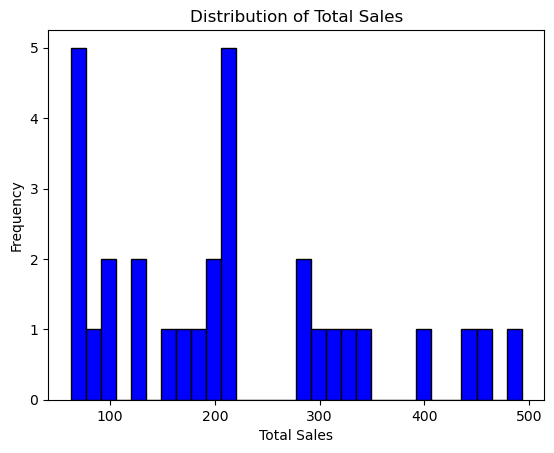

In [44]:
plt.hist(df['TotalSales'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

### Quantity Trend Analysis

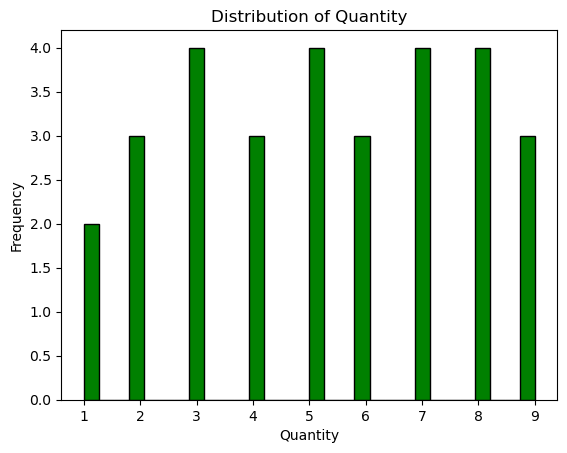

In [46]:
plt.hist(df['Quantity'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


### UnitPrice Trend Analysis

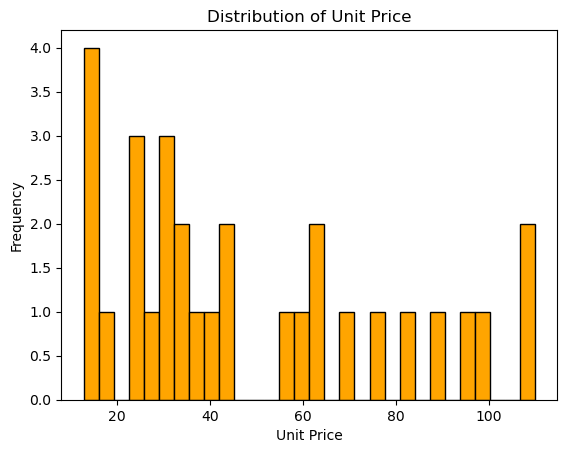

In [48]:
plt.hist(df['UnitPrice'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


### Calculating Descriptive Statistic

In [50]:
# Descriptive statistics
statistics = {
    'Mean': df[['TotalSales', 'Quantity', 'UnitPrice']].mean(),
    'Median': df[['TotalSales', 'Quantity', 'UnitPrice']].median(),
    'Standard Deviation': df[['TotalSales', 'Quantity', 'UnitPrice']].std()
}

# Convert to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics)
print(stats_df)

                  Mean   Median  Standard Deviation
TotalSales  215.941333  206.505          124.074028
Quantity      5.233333    5.000            2.486978
UnitPrice    48.989333   38.550           30.265914


## Finding Correlations

### Disclaimer and Rule of Thumbs

In [53]:
# Reminder: 

# +1: Perfect positive correlation (as one variable increases, the other increases).
# -1: Perfect negative correlation (as one variable increases, the other decreases).
# 0: No correlation (no relationship).

# Thresholds (rule of thumb):

# 0.7 to 1: Strong positive correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.0 to 0.3: Weak positive correlation.
# Similar for negative values.

# Untuk kasus ini data tidak monotonic (distribusi linear atau normal) sehingga sebaiknya menggunakan Pearson matrix.

# (Contoh optimal ketika menggunakan Spearman Matrix: data dengan ranking.)

### Pearson Matrix

In [55]:
# Calculate correlation matrix
correlation_matrix = df[['TotalSales', 'Quantity', 'UnitPrice']].corr(method='pearson')

print("Correlation Matrix (Pearson):")
print(correlation_matrix)


Correlation Matrix (Pearson):
            TotalSales  Quantity  UnitPrice
TotalSales    1.000000  0.229768   0.590254
Quantity      0.229768  1.000000  -0.555767
UnitPrice     0.590254 -0.555767   1.000000


### Spearman Matrix

In [57]:
# Spearman correlation
correlation_matrix_spearman = df[['TotalSales', 'Quantity', 'UnitPrice']].corr(method='spearman')

print("Correlation Matrix (Spearman):")
print(correlation_matrix_spearman)


Correlation Matrix (Spearman):
            TotalSales  Quantity  UnitPrice
TotalSales    1.000000  0.266209   0.597775
Quantity      0.266209  1.000000  -0.574511
UnitPrice     0.597775 -0.574511   1.000000


### Scatterplot

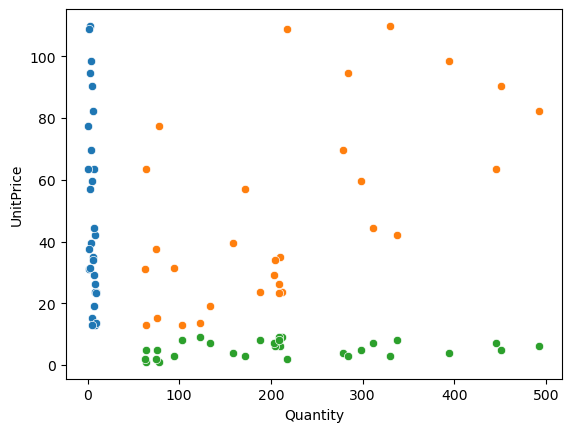

In [59]:
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')
sns.scatterplot(data=df, x='TotalSales', y='UnitPrice')
sns.scatterplot(data=df, x='TotalSales', y='Quantity')
plt.show()


### Correlation Matrix Analysis 

In [61]:
## TotalSales and UnitPrice:

# Pearson: 0.59, Spearman: 0.60
# Moderate positive correlation. Higher UnitPrice generally leads to higher TotalSales.

## TotalSales and Quantity:

# Pearson: 0.23, Spearman: 0.27
# Weak positive correlation. Higher Quantity slightly contributes to higher TotalSales.

## Quantity and UnitPrice:

# Pearson: -0.56, Spearman: -0.57
# Moderate negative correlation. Higher Quantity tends to correlate with lower UnitPrice.

### Heatmap with Pearson Matrix

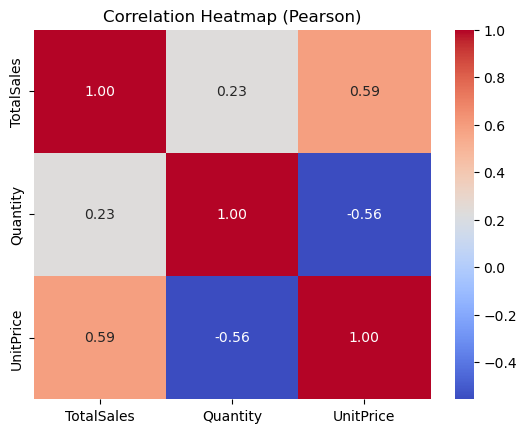

In [63]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Pearson)')
plt.show()


## Exploring Categorical Data

### Counting each categories:

In [66]:
# Count categories
product_counts = df['ProductCategory'].value_counts()
customer_counts = df['CustomerType'].value_counts()

print("ProductCategory counts:")
print(product_counts)

print("\nCustomerType counts:")
print(customer_counts)


ProductCategory counts:
ProductCategory
Electronics    10
Clothing       10
Books          10
Name: count, dtype: int64

CustomerType counts:
CustomerType
New          17
Returning    13
Name: count, dtype: int64


### Data Distribution Visualization

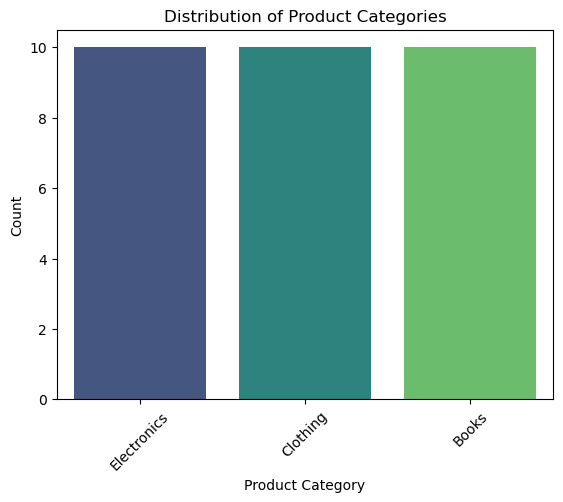

In [68]:
sns.barplot(y=product_counts.values, x=product_counts.index, hue=product_counts.index, dodge=False, palette="viridis", legend=False)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels
plt.show()


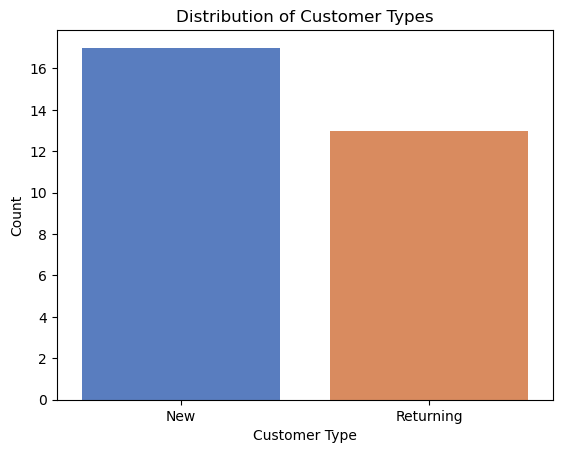

In [69]:
sns.barplot(y=customer_counts.values, x=customer_counts.index, hue=customer_counts.index, dodge=False, palette="muted", legend=False)
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


## Time Series Analysis on Sales Trend

### Converting 'OrderDate' to Datetime Format

In [72]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

### Daily Sales Trend Visualization

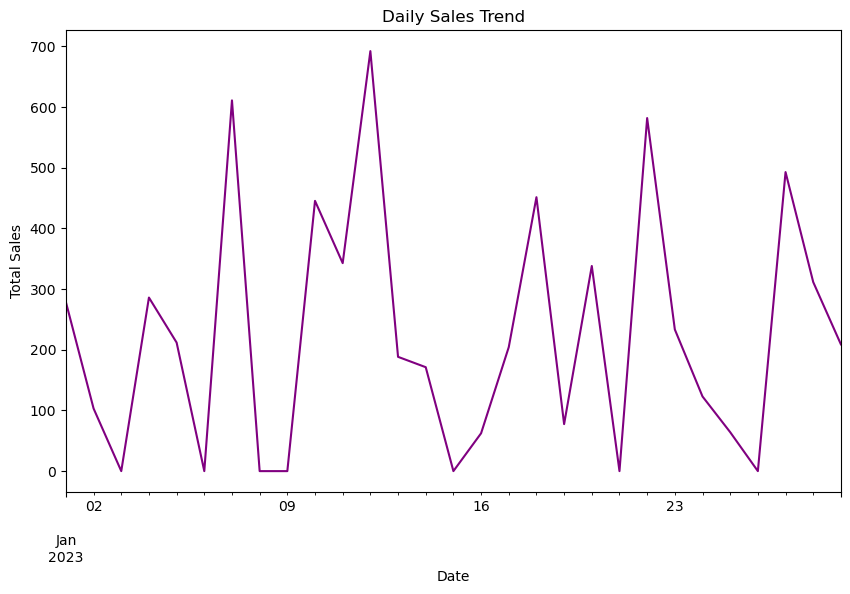

In [74]:
# Resample by day and calculate total sales
daily_sales = df.resample('D')['TotalSales'].sum()

# Fill missing values with 0 (if there are missing dates)
daily_sales = daily_sales.fillna(0)

# Plot the daily sales trend
daily_sales.plot(figsize=(10, 6), color='purple', title='Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


## Identifying Potential Outliers in the 'TotalSales' or 'UnitPrice'

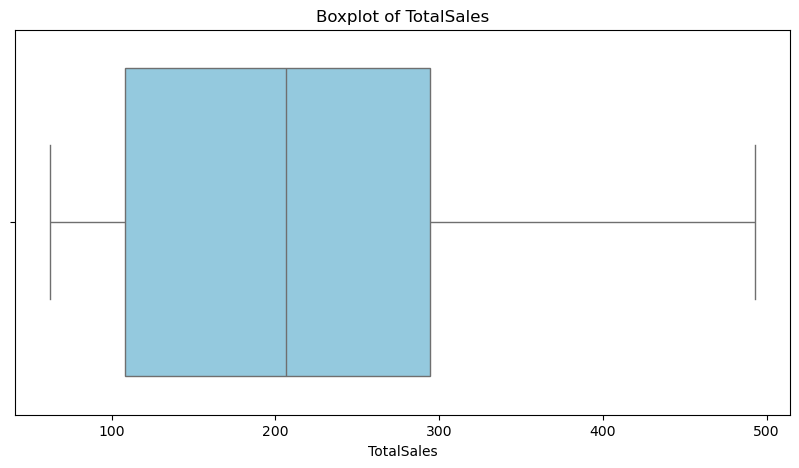

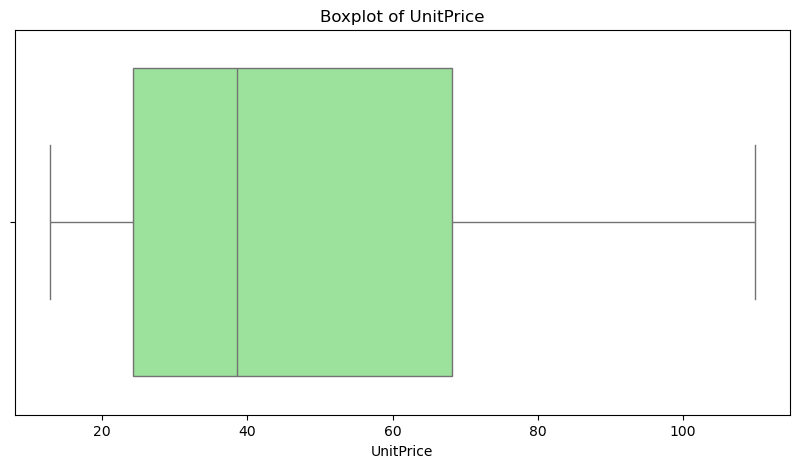

In [76]:
# Boxplot for TotalSales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TotalSales'], color='skyblue')
plt.title('Boxplot of TotalSales')
plt.show()

# Boxplot for UnitPrice
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['UnitPrice'], color='lightgreen')
plt.title('Boxplot of UnitPrice')
plt.show()

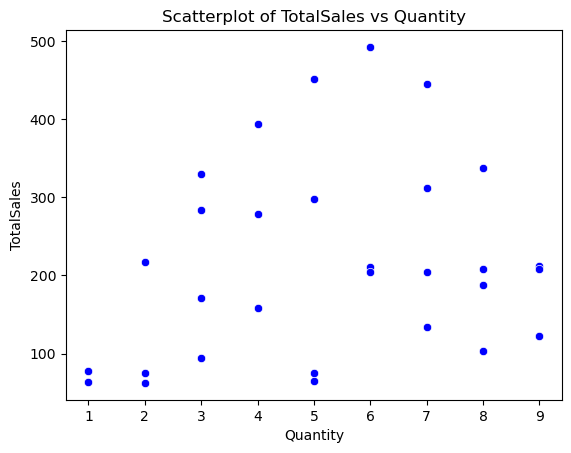

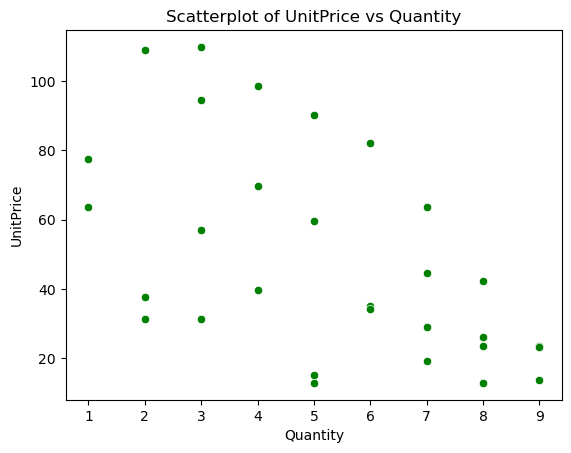

In [77]:
# Scatterplot for TotalSales vs Quantity
sns.scatterplot(data=df, x='Quantity', y='TotalSales', color='blue')
plt.title('Scatterplot of TotalSales vs Quantity')
plt.show()

# Scatterplot for UnitPrice vs Quantity
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', color='green')
plt.title('Scatterplot of UnitPrice vs Quantity')
plt.show()


In [78]:
# Function to calculate outlier bounds
def calculate_outlier_bounds(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate bounds for TotalSales
total_sales_lower, total_sales_upper = calculate_outlier_bounds('TotalSales')
print(f'TotalSales - Lower Bound: {total_sales_lower}, Upper Bound: {total_sales_upper}')

# Calculate bounds for UnitPrice
unit_price_lower, unit_price_upper = calculate_outlier_bounds('UnitPrice')
print(f'UnitPrice - Lower Bound: {unit_price_lower}, Upper Bound: {unit_price_upper}')


TotalSales - Lower Bound: -171.32, Upper Bound: 573.86
UnitPrice - Lower Bound: -41.73125000000001, Upper Bound: 134.03875


In [79]:

# Identify outliers for TotalSales
outliers_total_sales = df[(df['TotalSales'] < total_sales_lower) | (df['TotalSales'] > total_sales_upper)]
print("\nOutliers in TotalSales:")
print(outliers_total_sales)

# Identify outliers for UnitPrice
outliers_unit_price = df[(df['UnitPrice'] < unit_price_lower) | (df['UnitPrice'] > unit_price_upper)]
print("\nOutliers in UnitPrice:")
print(outliers_unit_price)

# Note:
# The "Index: []" indicates that there are no outliers in the dataset for the given column.
# This happens when all values in the column fall within the calculated IQR bounds:
# - TotalSales bounds: {total_sales_lower} to {total_sales_upper}
# - UnitPrice bounds: {unit_price_lower} to {unit_price_upper}
# If the DataFrame is empty, it simply means no values are outside these ranges.



Outliers in TotalSales:
Empty DataFrame
Columns: [ProductCategory, CustomerType, TotalSales, Quantity, UnitPrice]
Index: []

Outliers in UnitPrice:
Empty DataFrame
Columns: [ProductCategory, CustomerType, TotalSales, Quantity, UnitPrice]
Index: []


# Data Insights

## Interesting Insights from Dataset

In [105]:
# Unit Price and Quantity Relationship:
# Products with higher prices have lower quantities, but the contribution to total sales remains significant. 
# This suggests a premium pricing strategy can be effective for certain categories.

# Product Category Dominance and Customer Type:
# Categorical analysis shows that certain categories may be more desirable to customers, especially when compared between new and existing customers.

# Daily Sales Trends:
# Sales do not show a consistent pattern, suggesting that marketing strategies may not be focused at a particular time. 
# There is an opportunity to explore more specific marketing campaigns on certain days or months.

## Is there a pattern or trend that can be observed?

In [107]:
# Daily Fluctuations:
# Daily sales show large variations, but no obvious seasonal or weekly patterns.

# Dominant Product Categories:
# Certain categories may dominate sales, which could be the focus of inventory optimization or marketing.

# Numerical Variable Relationships:
# A positive correlation between TotalSales and UnitPrice indicates that sales are driven by higher-priced products.

## Correlation between Variables

In [109]:
# TotalSales vs UnitPrice:
# Moderate positive correlation: Products with higher prices tend to contribute more to total sales.

# Quantity vs UnitPrice:
# Moderate negative correlation: Products with higher prices tend to be sold in smaller quantities.

# TotalSales vs Quantity:
# Weak positive correlation: Although high quantity can increase total sales, the effect is not as great as unit price.